In [13]:
import os
import typing
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import *
import sklearn.gaussian_process.kernels as ker
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from solution import *


# Set `EXTENDED_EVALUATION` to `True` in order to visualize your predictions.
EXTENDED_EVALUATION = False
EVALUATION_GRID_POINTS = 300  # Number of grid points used in extended evaluation
EVALUATION_GRID_POINTS_3D = 50  # Number of points displayed in 3D during evaluation


# Cost function constants
COST_W_UNDERPREDICT = 25.0
COST_W_NORMAL = 1.0
COST_W_OVERPREDICT = 10.0

In [14]:
train_features = np.loadtxt("train_x.csv", delimiter=",", skiprows=1)
train_GT = np.loadtxt("train_y.csv", delimiter=",", skiprows=1)
test_features = np.loadtxt("test_x.csv", delimiter=",", skiprows=1)

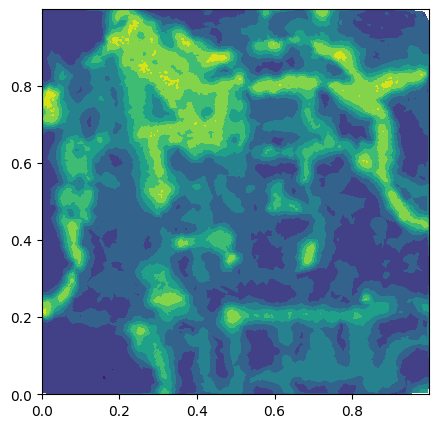

In [15]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(train_features[:,0], train_features[:,1], train_GT)
#plt.scatter(train_features[:,0], train_features[:,1], color='red', alpha=1, s=np.ones_like(train_GT)*0.5)

# Main

In [42]:
print("ground truth parameters",train_GT.min(), train_GT.max(), train_GT.mean())

# Fit the model
print("Fitting model")
model = Model()
model.fitting_model(
        train_GT, 
        train_features,         
        sample_size = 3000,
        length_scale=0.01,
        alpha=5, #5,
        length_scale_bounds=(1e-05, 100000.0),
        alpha_bounds=(1e-05, 100000.0)
        )

ground truth parameters -1.7625469060104306 64.896183806836 33.17299788386897
Fitting model
fit runtime :  44.347994804382324


In [44]:
# Predict on the test features
print("Predicting on test features")
const = 2.2

predictions, gp_mean, gp_std = model.make_predictions(test_features, add_constant=const)
print(predictions, predictions.min(), predictions.max())

cost_of_pred = cost_function(train_GT, model.make_predictions(train_features, add_constant=const)[0])
print(cost_of_pred)

Predicting on test features
[58.69499699 60.70555424 43.49525594 ... 40.25458858 53.60283375
 42.28689779] 3.382031302874066 64.70365317583457
222.58982378044033


In [12]:
print(predictions.mean())
print(train_GT.mean())

36.48901571218051
33.17299788386897


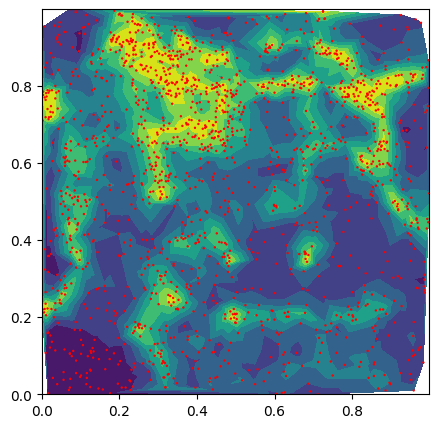

In [11]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(test_features[:,0], test_features[:,1], predictions)
plt.scatter(test_features[:,0], test_features[:,1], color='red', alpha=1, s=np.ones_like(predictions)*0.5)